# Data Exploration & Feature Engineering

# 1. Data Exploration

In [1]:
import pandas as pd
import numpy as np

### Loading data:
The files can be downloaded from: http://datahack.analyticsvidhya.com/contest/practice-problem-bigmart-sales-prediction

In [2]:
#Read files:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
#Combine test and train into one file
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [4]:
#Check missing values:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [5]:
#Numerical data summary:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
#Number of unique values in each:
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [7]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
#Print frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for varible %s'%col)
    print(data[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

Frequency of Categories for varible Item_Type
Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64

Frequency of Categories for varible Outlet_Size
Outlet_Size
Medium    4655
Small     3980
High      1553
Name: count, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name

# 2. Data Cleaning

### Imputation

In [8]:
#Determine the average weight per item:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
item_avg_weight = item_avg_weight.fillna(0)
#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Item_Weight'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print('Orignal #missing: %d'% sum(miss_bool))


Orignal #missing: 2439


In [9]:
item_avg_weight.reset_index(inplace=True)

In [10]:
miss_bool

0        False
1        False
2        False
3        False
4        False
         ...  
14199    False
14200    False
14201    False
14202    False
14203    False
Name: Item_Weight, Length: 14204, dtype: bool

In [11]:
data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight[item_avg_weight["Item_Identifier"]==x]["Item_Weight"].values[0])
print('Final #missing: %d'% sum(data['Item_Weight'].isnull()))

Final #missing: 0


In [12]:
data[["Outlet_Size", "Outlet_Type"]].head(n=5)

,Outlet_Size,Outlet_Type
0,Medium,Supermarket Type1
1,Medium,Supermarket Type2
2,Medium,Supermarket Type1
3,NaN,Grocery Store
4,High,Supermarket Type1


In [13]:
data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [14]:
mode_by_type = data.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
data['Outlet_Size'] = data.apply(lambda row: mode_by_type[row['Outlet_Type']] if pd.isnull(row['Outlet_Size']) else row['Outlet_Size'], axis=1)


In [15]:
#Import mode function:
from scipy.stats import mode

#OHE for Outlet_Size
ohe_data = pd.get_dummies(data, columns=['Outlet_Size'], prefix='Size')
data = ohe_data


# 3. Feature Engineering:

### Consider combining categories in Outlet_Type

In [16]:
#Check the mean sales by type:
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [19]:
visibility_avg[visibility_avg["Item_Identifier"]==x]["Item_Visibility"].values[0]

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


### Modify Item_Visibility

In [28]:
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')
visibility_avg.reset_index(inplace=True)
#Impute 0 values with mean visibility of that product:
miss_bool = (data['Item_Visibility'] == 0)

print('Number of 0 values initially: %d' % sum(miss_bool))
data.loc[miss_bool, 'Item_Visibility'] = data.loc[miss_bool, 'Item_Identifier'].apply(lambda x: visibility_avg[visibility_avg["Item_Identifier"]==x]["Item_Visibility"].values[0])
print('Number of 0 values after modification: %d' % sum(data['Item_Visibility'] == 0))


Number of 0 values initially: 879
Number of 0 values after modification: 0


In [73]:
def calculate_visibility_ration(x):
    avg_visibility = (visibility_avg[visibility_avg["Item_Identifier"]==x["Item_Identifier"]]['Item_Visibility'])
    res = x['Item_Visibility']/avg_visibility
    return res.values[0]

In [75]:
#Determine another variable with means ratio
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: calculate_visibility_ration(x), axis=1)
print (data['Item_Visibility_MeanRatio'].describe())

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


### Create a broad category of Type of Item

In [76]:
#Item type combine:
data['Item_Identifier'].value_counts()
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Item_Type_Combined
Food              10201
Non-Consumable     2686
Drinks             1317
Name: count, dtype: int64

### Determine the years of operation of a store

In [77]:
#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

### Modify categories of Item_Fat_Content

In [78]:
#Change categories of low fat:
print ('Original Categories:')
print (data['Item_Fat_Content'].value_counts())

print ('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print (data['Item_Fat_Content'].value_counts())

Original Categories:
Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

Modified Categories:
Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64


In [79]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       6499
Regular       5019
Non-Edible    2686
Name: count, dtype: int64

In [82]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'source', 'Size_High', 'Size_Medium', 'Size_Small',
       'Item_Visibility_MeanRatio', 'Item_Type_Combined', 'Outlet_Years',
       'Outlet'],
      dtype='object')

### Numerical and One-Hot Coding of Categorical variables

In [83]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Size_High', 'Size_Medium', 'Size_Small', 'Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [84]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Size_High', 'Size_Medium', 'Size_Small','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [85]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0              bool
Item_Fat_Content_1              bool
Item_Fat_Content_2              bool
Outlet_Location_Type_0          bool
Outlet_Location_Type_1          bool
Outlet_Location_Type_2          bool
Size_High_0                     bool
Size_High_1                     bool
Size_Medium_0                   bool
Size_Medium_1                   bool
Size_Small_0                    bool
Size_Small_1                    bool
Outlet_Type_0                   bool
Outlet_Type_1                   bool
Outlet_Type_2                   bool
Outlet_Type_3                   bool
I

In [86]:
data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,True,False,False
1,False,False,True
2,True,False,False
3,False,False,True
4,False,True,False
5,False,False,True
6,False,False,True
7,True,False,False
8,False,False,True
9,False,False,True


### Exporting Data

In [87]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

/var/folders/sv/2rphf3l527s_zfpd3b_sm49c0000gp/T/ipykernel_19770/1951072592.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
/var/folders/sv/2rphf3l527s_zfpd3b_sm49c0000gp/T/ipykernel_19770/1951072592.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['source'],axis=1,inplace=True)


# 3. Model Training

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [2]:
train = pd.read_csv("train_modified.csv")
test = pd.read_csv("test_modified.csv")

In [4]:
print( train.shape)
train.dtypes

(8523, 37)


Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Identifier             object
Item_Outlet_Sales            float64
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0              bool
Item_Fat_Content_1              bool
Item_Fat_Content_2              bool
Outlet_Location_Type_0          bool
Outlet_Location_Type_1          bool
Outlet_Location_Type_2          bool
Size_High_0                     bool
Size_High_1                     bool
Size_Medium_0                   bool
Size_Medium_1                   bool
Size_Small_0                    bool
Size_Small_1                    bool
Outlet_Type_0                   bool
Outlet_Type_1                   bool
Outlet_Type_2                   bool
Outlet_Type_3                   bool
Item_Type_Combined_0            bool
Item_Type_Combined_1            bool
Item_Type_Combined_2            bool
O

## Baseline models:

In [5]:
#Mean based:
mean_sales = train['Item_Outlet_Sales'].mean()

#Define a dataframe with IDs for submission:
base1 = test[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales'] = mean_sales

#Export submission file
base1.to_csv("alg0.csv",index=False)

/var/folders/sv/2rphf3l527s_zfpd3b_sm49c0000gp/T/ipykernel_20032/2560994169.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base1['Item_Outlet_Sales'] = mean_sales


## Function to fit and generate submission file:

In [15]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import model_selection, metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = model_selection.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print( "\nModel Report")
    print( "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

## Linear Regression Model:

In [16]:
from sklearn.linear_model import LinearRegression, Ridge


Model Report
RMSE : 1127
CV Score : Mean - 1129 | Std - 43.39 | Min - 1075 | Max - 1210


<Axes: title={'center': 'Model Coefficients'}>

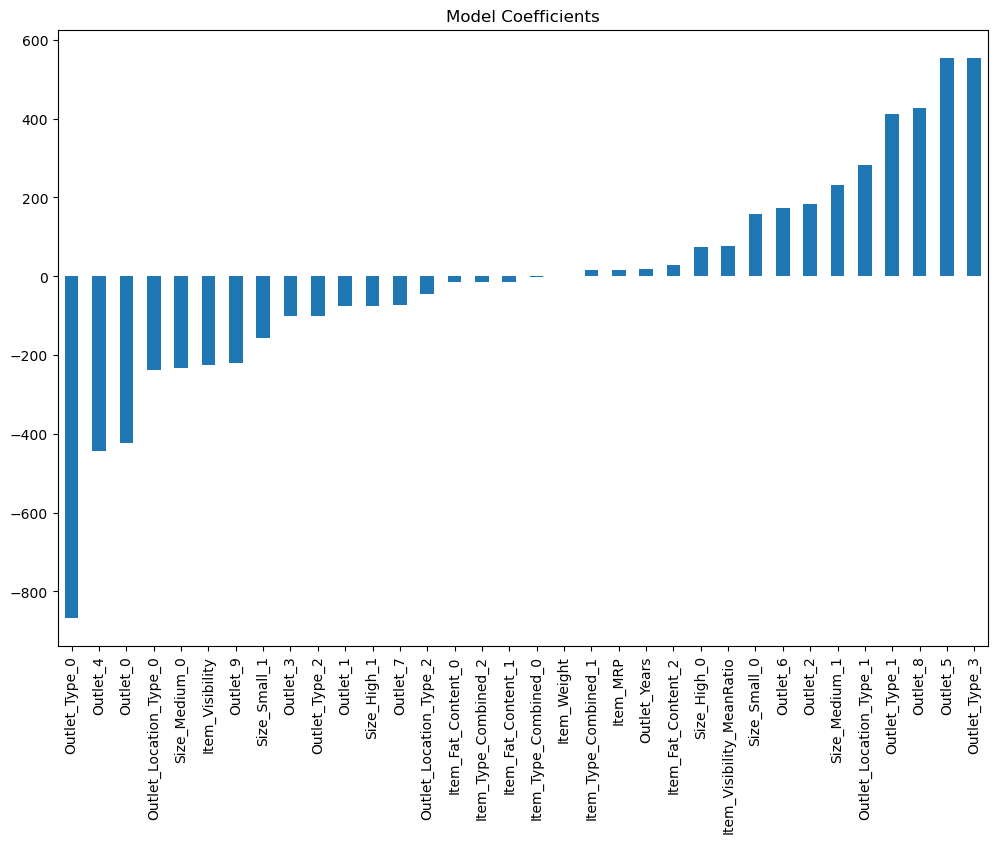

In [17]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression()
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

## Ridge Regression Model:


Model Report
RMSE : 1127
CV Score : Mean - 1129 | Std - 43.39 | Min - 1075 | Max - 1210


<Axes: title={'center': 'Model Coefficients'}>

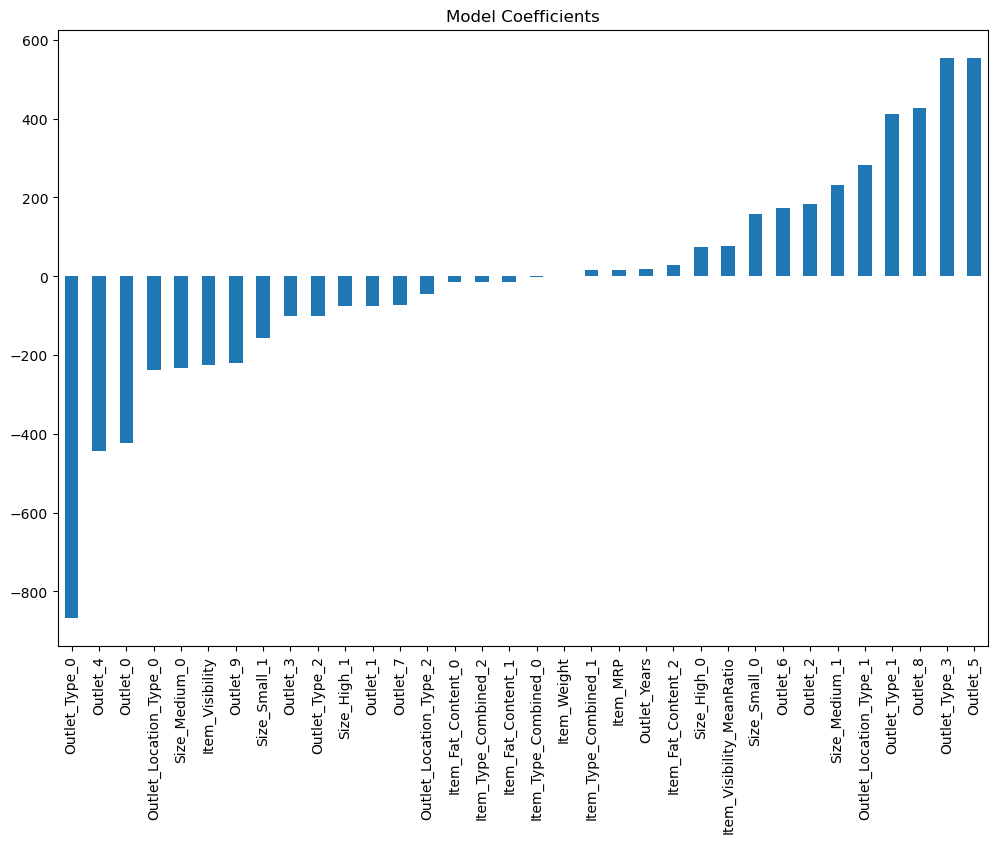

In [19]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

## Decision Tree Model:

In [20]:
from sklearn.tree import DecisionTreeRegressor


Model Report
RMSE : 1058
CV Score : Mean - 1091 | Std - 45.42 | Min - 1003 | Max - 1186


<Axes: title={'center': 'Feature Importances'}>

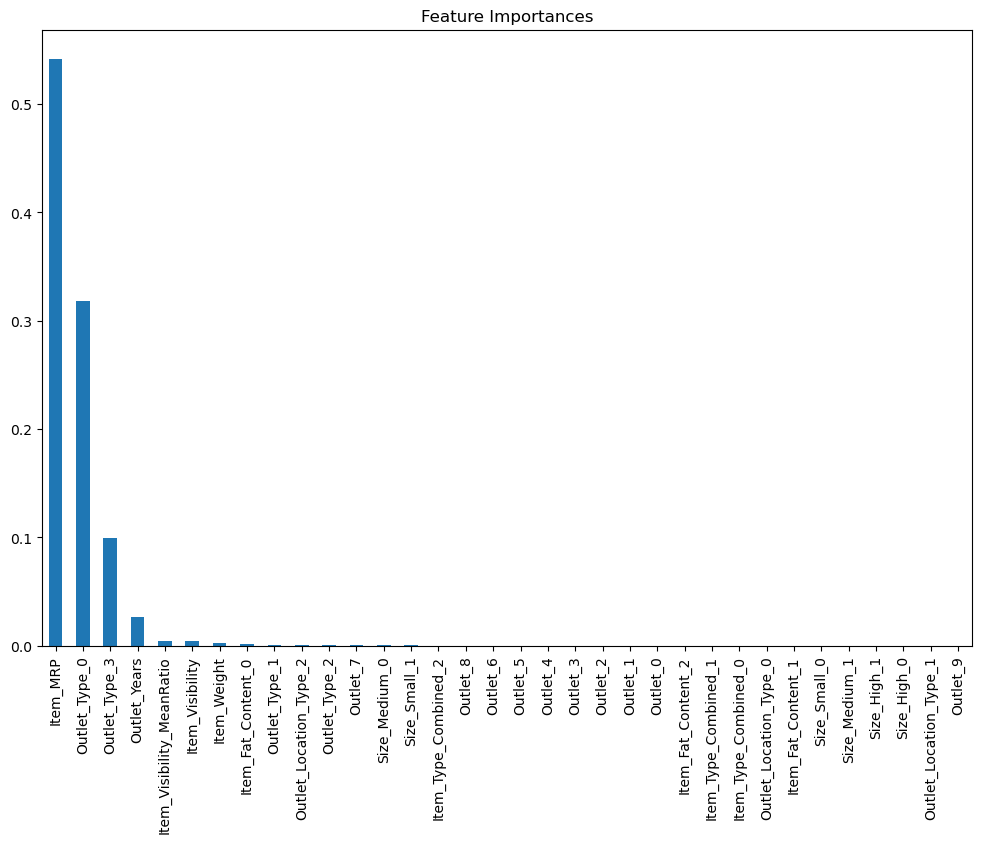

In [21]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1071
CV Score : Mean - 1096 | Std - 43.3 | Min - 1027 | Max - 1172


<Axes: title={'center': 'Feature Importances'}>

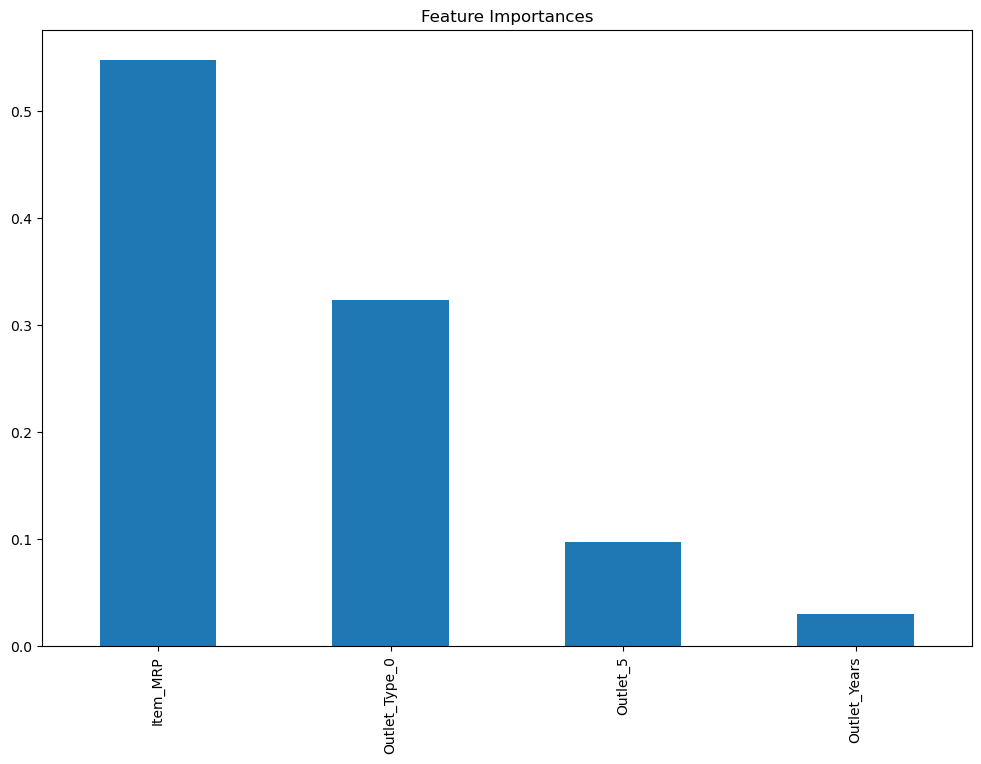

In [22]:
predictors = ['Item_MRP','Outlet_Type_0','Outlet_5','Outlet_Years']
alg4 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg4, train, test, predictors, target, IDcol, 'alg4.csv')
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

## Random Forest Model:
Note: random forest models are not 100% replicable. So the outputs might differ very slightly but should be around the ballpark.

In [23]:
from sklearn.ensemble import RandomForestRegressor


Model Report
RMSE : 1073
CV Score : Mean - 1084 | Std - 43.77 | Min - 1020 | Max - 1161


<Axes: title={'center': 'Feature Importances'}>

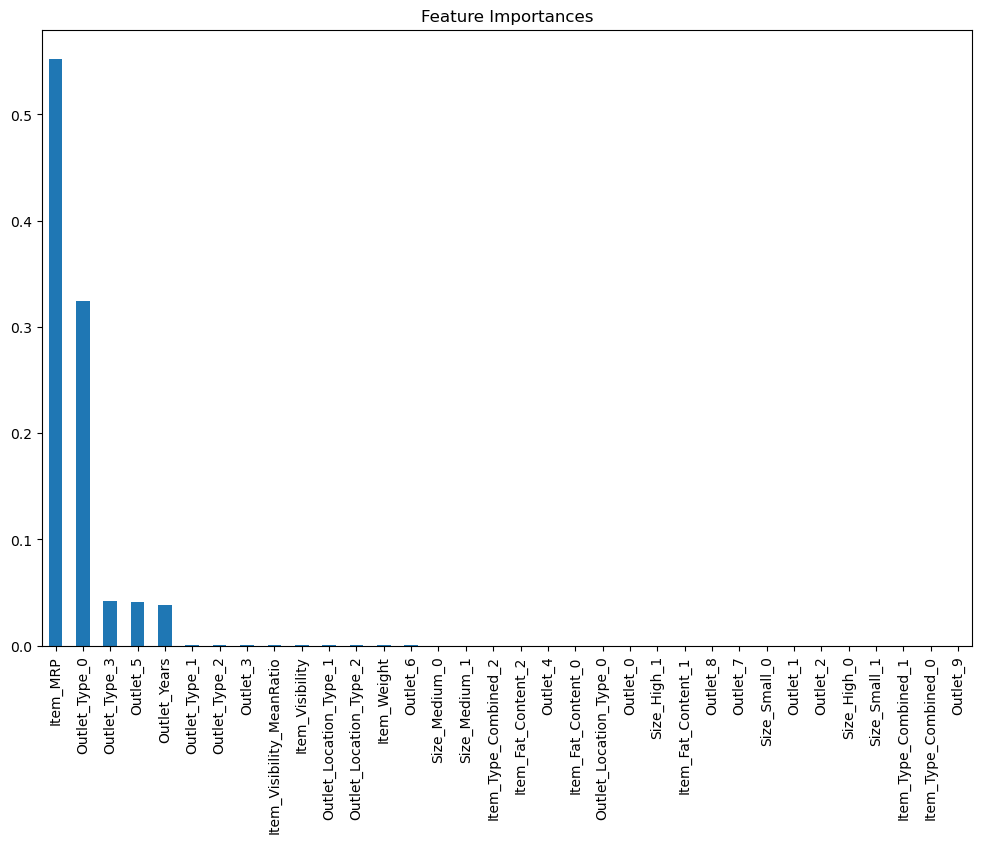

In [24]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1068
CV Score : Mean - 1083 | Std - 43.77 | Min - 1019 | Max - 1161


<Axes: title={'center': 'Feature Importances'}>

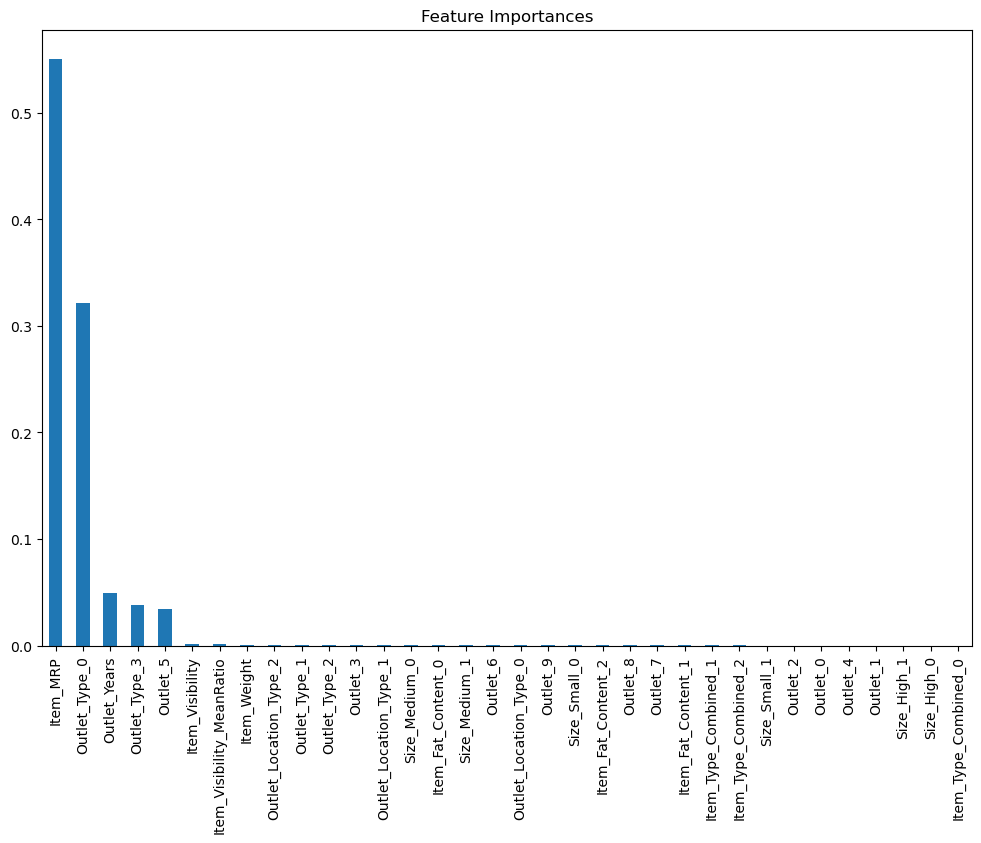

In [25]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg6 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
modelfit(alg6, train, test, predictors, target, IDcol, 'alg6.csv')
coef6 = pd.Series(alg6.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 0.1029
CV Score : Mean - 1228 | Std - 57.99 | Min - 1130 | Max - 1340


<Axes: title={'center': 'Feature Importances'}>

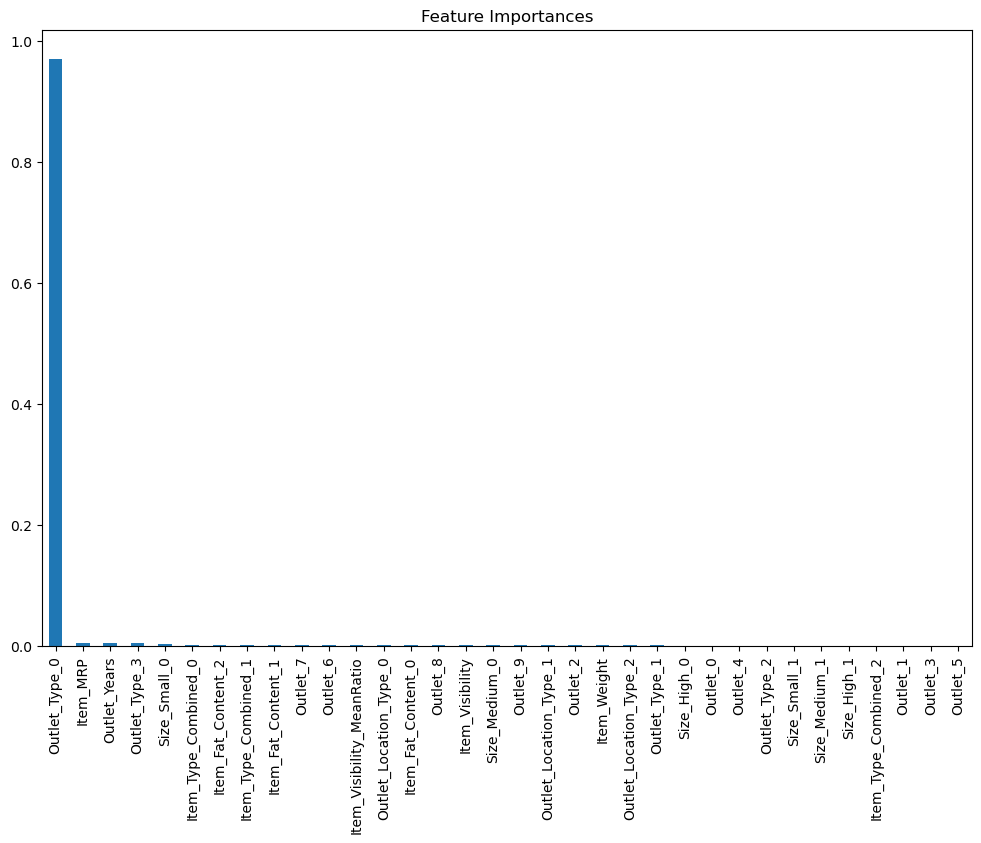

In [27]:
from xgboost import XGBRegressor

predictors = [x for x in train.columns if x not in [target] + IDcol]
alg3 = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=15, random_state=42)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg7.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

Fitting 20 folds for each of 30 candidates, totalling 600 fits

Model Report
RMSE : 964.2
CV Score : Mean - 1092 | Std - 52.67 | Min - 993.4 | Max - 1191
Filename: alg13.csv
Train RMSE: 964.1848
Test RMSE: 0.0076
Output saved successfully to alg13.csv with no negative values and only 3 columns.


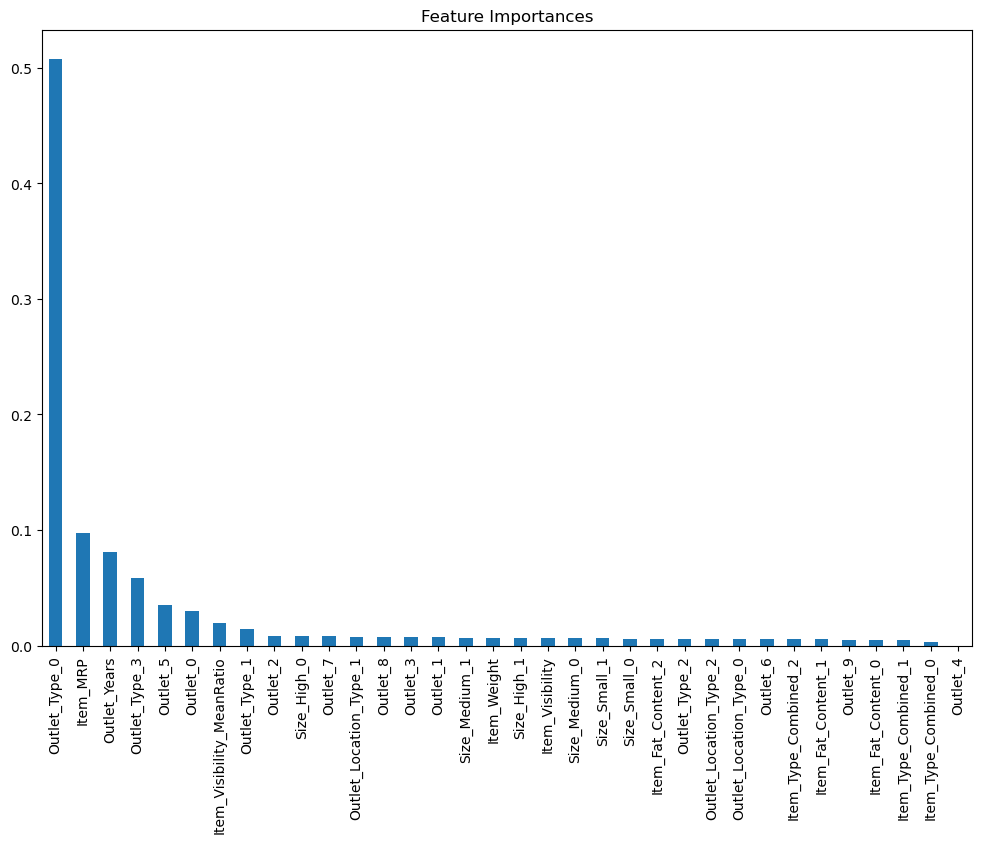

In [35]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import os
import pandas as pd

# Define predictors and filename logic
predictors = [x for x in train.columns if x not in [target] + IDcol]

# Auto-increment filename
base_name = 'alg'
counter = 9
while os.path.exists(f'{base_name}{counter}.csv'):
    counter += 1
filename = f'{base_name}{counter}.csv'

# Hyperparameter tuning grid
param_grid = {
    'n_estimators': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5, 7, 9],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0.1, 0.5, 1, 1.5]
}

# RandomizedSearchCV
xgb_model = XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=30,
    cv=20,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit the model
random_search.fit(train[predictors], train[target])
best_model = random_search.best_estimator_

# Model fitting and RMSE calculation
modelfit(best_model, train, test, predictors, target, IDcol, filename)

# Predictions with clipping and rounding
train_predictions = np.clip(best_model.predict(train[predictors]), 0, np.inf)
test_predictions = np.clip(best_model.predict(test[predictors]), 0, np.inf)

# Round predictions to 3 decimal points
train_predictions = np.round(train_predictions, 3)
test_predictions = np.round(test_predictions, 3)

# RMSE calculation
train_rmse = np.sqrt(mean_squared_error(train[target], train_predictions))
test_rmse = np.sqrt(mean_squared_error(test[target], test_predictions))

# Print RMSE with filename
print(f'Filename: {filename}')
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

# Feature importance plot
coef3 = pd.Series(best_model.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

# ✅ Save only the required columns to CSV (ID + Sales)
# Create a DataFrame with only ID and predictions
output_df = pd.DataFrame({
    IDcol[0]: test[IDcol[0]].values,         # ID column
    target: test_predictions                  # Predicted sales
})

# Ensure no negative values and round to 3 decimals
output_df[target] = np.clip(output_df[target], 0, np.inf).round(3)

# Save only the required columns to CSV
output_df.to_csv(filename, index=False)

print(f"Output saved successfully to {filename} with no negative values and only 3 columns.")
